# Preparing Time Series Data
Like most preparation processes, but now with dates!

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import user, password, host
import os
# from acquire import wrangle_store_data

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Acquire
We'll start by loading up the data from mysql server.

In [5]:
# The following are functions contained in the accompanying acquire.py file

def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

def get_store_data():
    '''
    Returns a dataframe of all store data in the tsa_item_demand database and saves a local copy as a csv file.
    '''
    query = '''
    SELECT *
    FROM items
    JOIN sales USING(item_id)
    JOIN stores USING(store_id) 
    '''
    
    df = pd.read_sql(query, get_db_url('tsa_item_demand'))
    
    df.to_csv('tsa_item_demand.csv', index=False)
    
    return df

def wrangle_store_data():
    filename = 'tsa_store_data.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename, index_col=0)
    else:
        df = get_store_data()
        
    return df

In [6]:
df = wrangle_store_data()

In [7]:
df.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [8]:
df.shape

(913000, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_id       913000 non-null  int64  
 8   store_state    913000 non-null  object 
 9   store_zipcode  913000 non-null  int64  
 10  item_brand     913000 non-null  object 
 11  item_id        913000 non-null  int64  
 12  item_name      913000 non-null  object 
 13  item_price     913000 non-null  float64
 14  item_upc12     913000 non-null  int64  
 15  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 118.4+ MB


In [10]:
df.tail()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221
912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221
912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221
912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221
912999,50,82.0,"Sun, 31 Dec 2017 00:00:00 GMT",913000,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221


In [13]:
# sanity check for null values:
(df.isnull().sum() != 0 ).sum()

0

In [14]:
df.columns

Index(['item', 'sale_amount', 'sale_date', 'sale_id', 'store', 'store_address',
       'store_city', 'store_id', 'store_state', 'store_zipcode', 'item_brand',
       'item_id', 'item_name', 'item_price', 'item_upc12', 'item_upc14'],
      dtype='object')

In [16]:
# how many unique stores?
df.store.nunique()

10

In [17]:
# how many unique items?
df.item.nunique()

50

In [18]:
df.sale_date.nunique()

1826

In [20]:
# number of unique timestamps * number of unique items * number of unique stores
(1826 * 10 * 50) == df.shape[0]

True

In [26]:
# does everything end with a junk timestamp?
(~df.sale_date.str.endswith(' 00:00:00 GMT')).sum() == 0

True

In [21]:
df.sale_date.min()

'Fri, 01 Apr 2016 00:00:00 GMT'

In [22]:
df.sale_date.max()

'Wed, 31 May 2017 00:00:00 GMT'

In [28]:
# df.sale_date.str.replace(' 00:00:00 GMT', '')

In [29]:
# because everything ends with this zero timestamp,
# I'm going to go ahead and cut it off with a replace
# before converting it to a pandas datetime
df['sale_date'] = pd.to_datetime(df['sale_date'].str.replace(' 00:00:00 GMT', ''))

In [32]:
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

In [30]:
# does our min match our old min?
df.sale_date.min()

Timestamp('2013-01-01 00:00:00')

In [31]:
df.sale_date.max()

Timestamp('2017-12-31 00:00:00')

In [23]:
pd.to_datetime(df.sale_date)

0        2013-01-01 00:00:00+00:00
1        2013-01-02 00:00:00+00:00
2        2013-01-03 00:00:00+00:00
3        2013-01-04 00:00:00+00:00
4        2013-01-05 00:00:00+00:00
                    ...           
912995   2017-12-27 00:00:00+00:00
912996   2017-12-28 00:00:00+00:00
912997   2017-12-29 00:00:00+00:00
912998   2017-12-30 00:00:00+00:00
912999   2017-12-31 00:00:00+00:00
Name: sale_date, Length: 913000, dtype: datetime64[ns, UTC]

In [33]:
# reassign this new formatted datetime to our index
df = df.set_index('sale_date').sort_index()

In [34]:
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


# Defining observations:

In [35]:
# when we examined the unique number of items, stores, and dates
# present in our data set, we observed that the size of the dataframe
# is the number of days we have data for multiplied by the number of stores and by the
# number of items,
# meaning that each row is an assessment of a specific item at a specific store that day

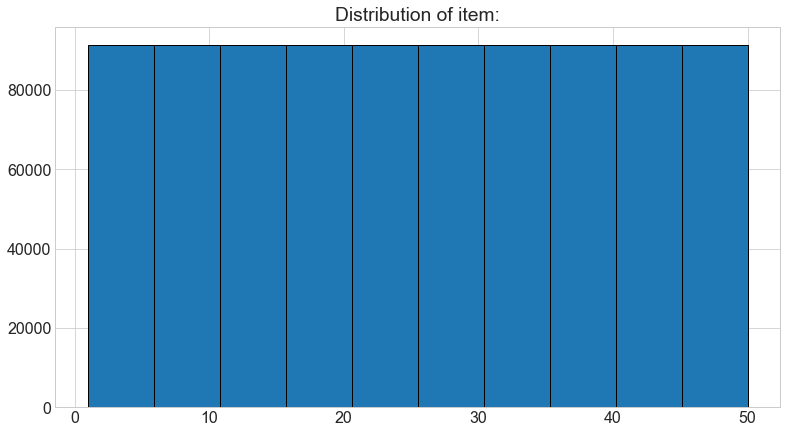

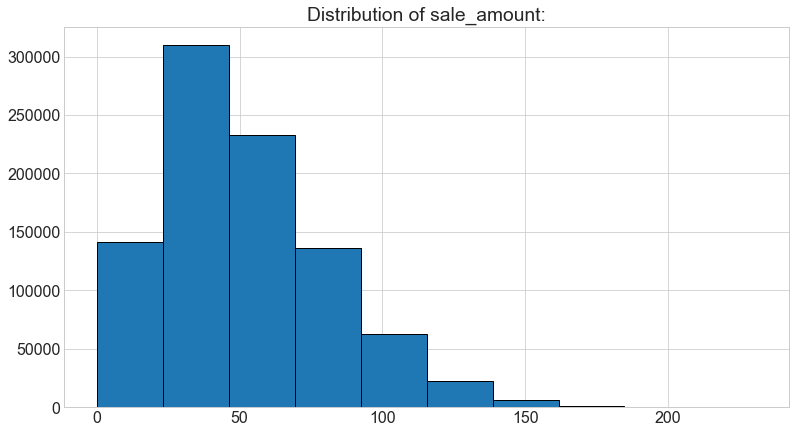

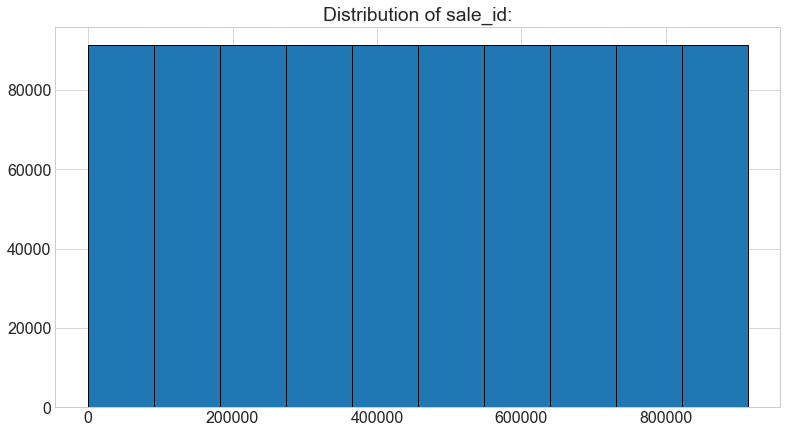

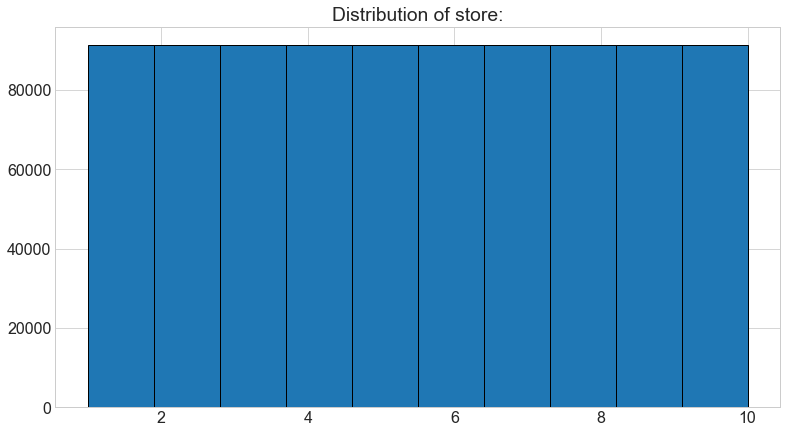

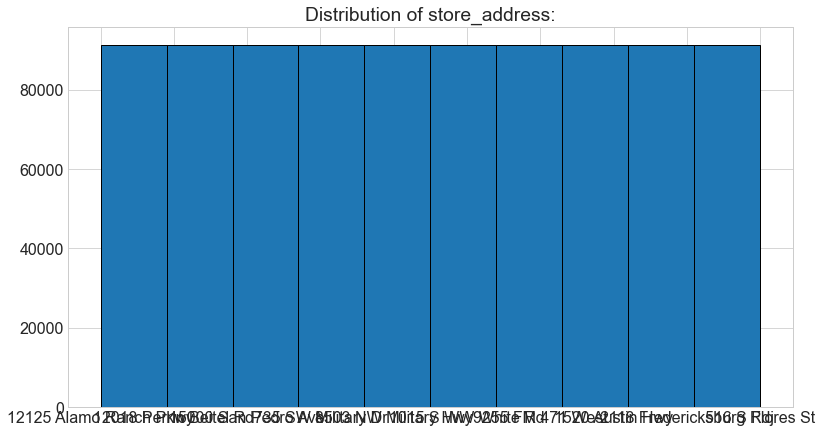

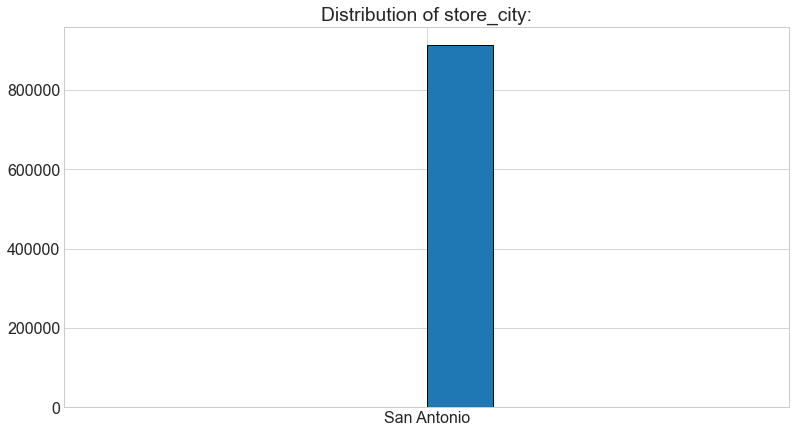

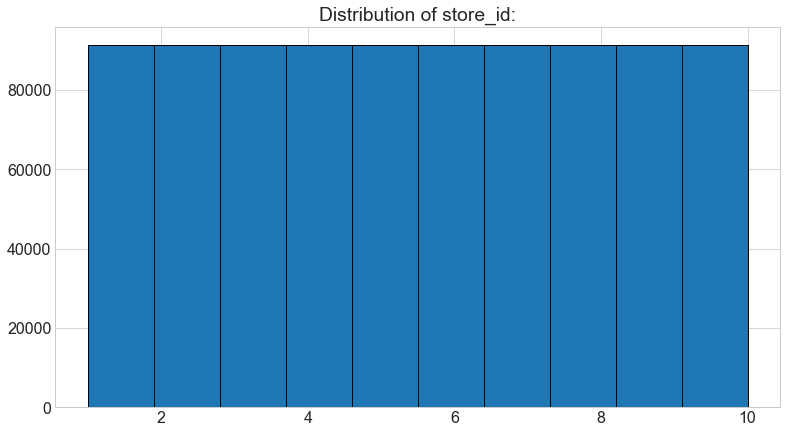

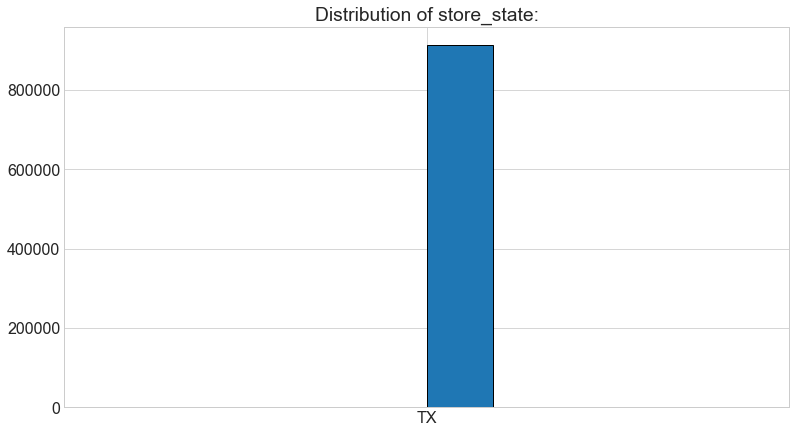

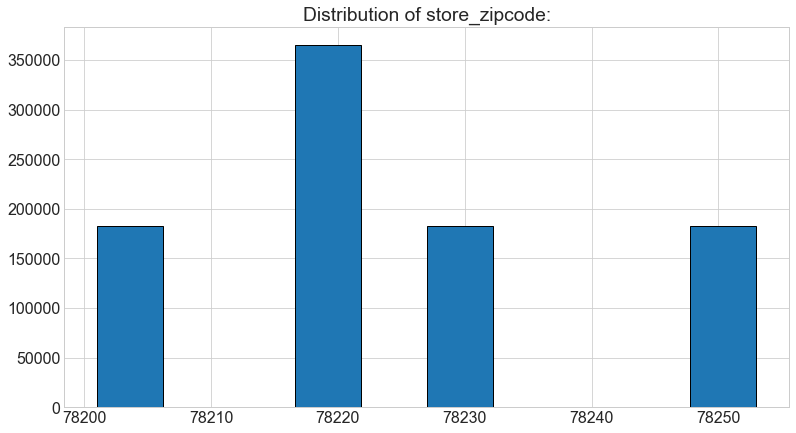

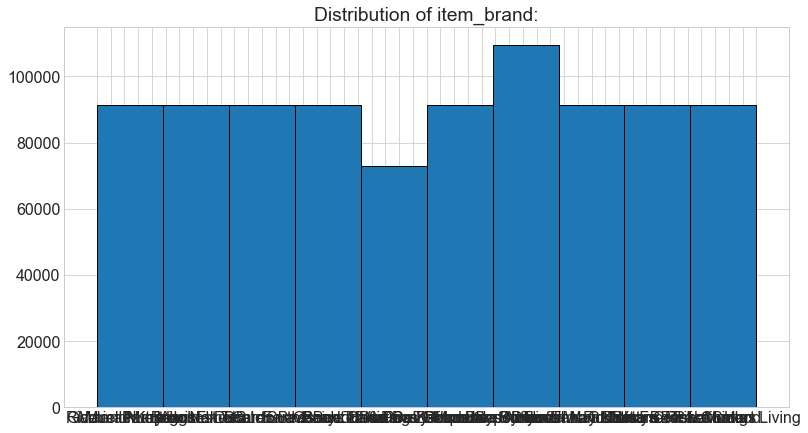

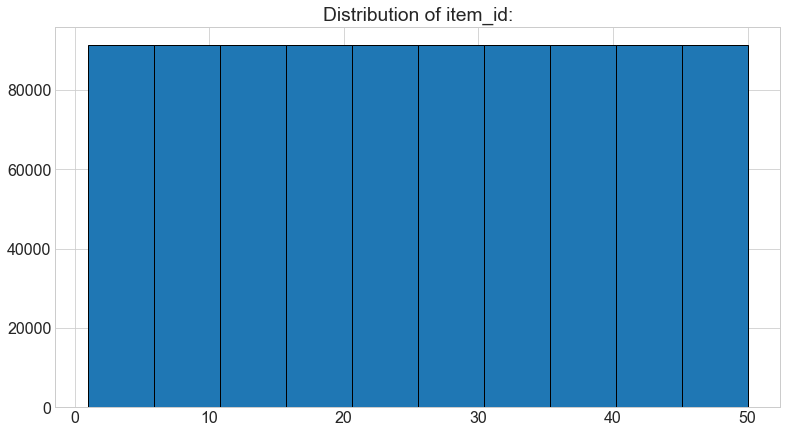

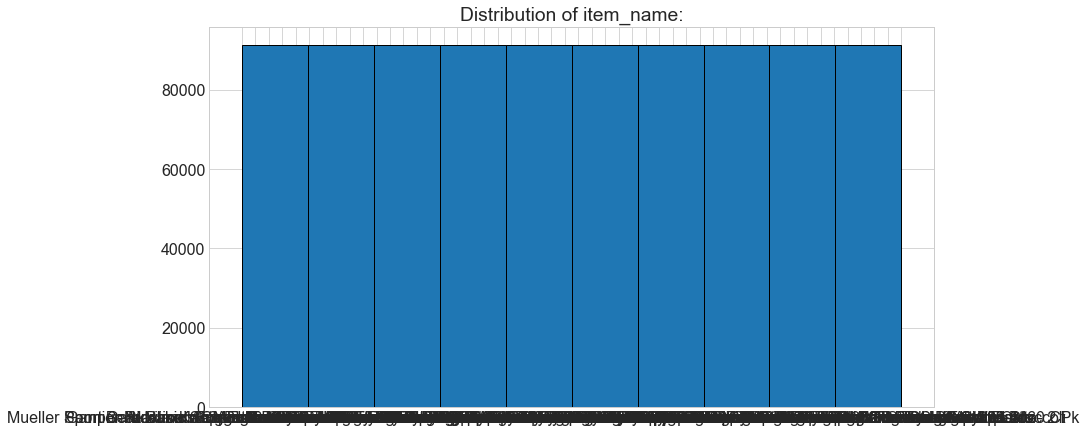

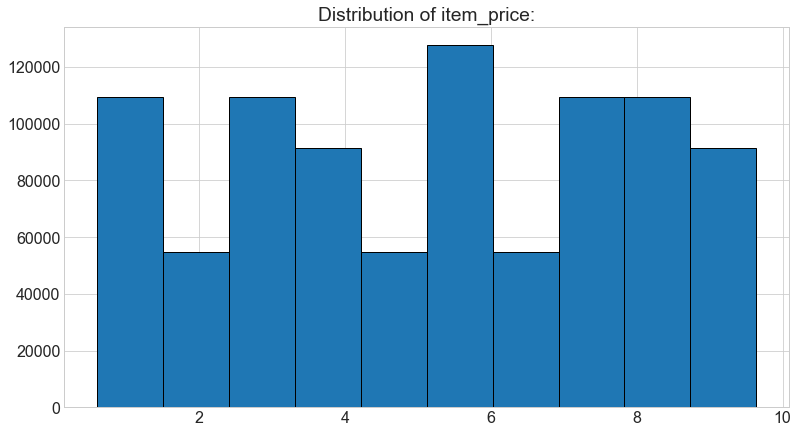

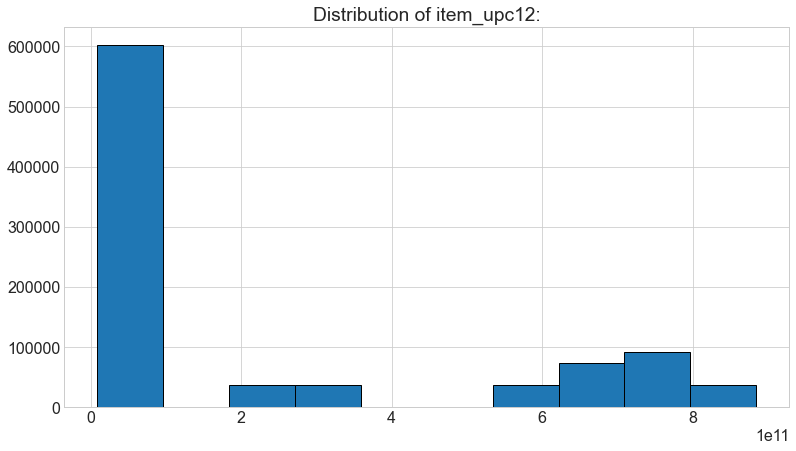

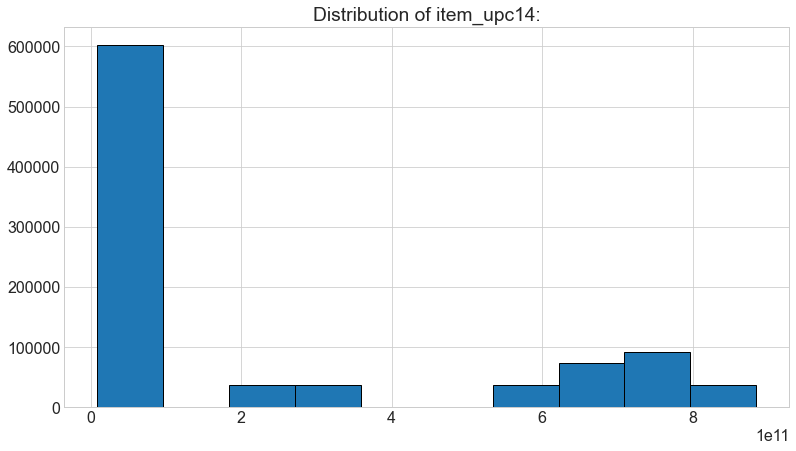

In [37]:
for col in df.columns:
    plt.hist(df[col], edgecolor='black')
    plt.title(f'Distribution of {col}:')
    plt.show()

We appear to have some information here in regard to the scope of what sales look like over the course of these instances of store/item/day combinations
 
 Where we see flux seems to incur on sales, where we see that there are more instances that sit in the middle than those that are in the lower or higher areas, resembling something a bit more normal than the other columns

In [40]:
by_date = df.groupby('sale_date').sale_amount.sum().reset_index()

<AxesSubplot:xlabel='sale_date'>

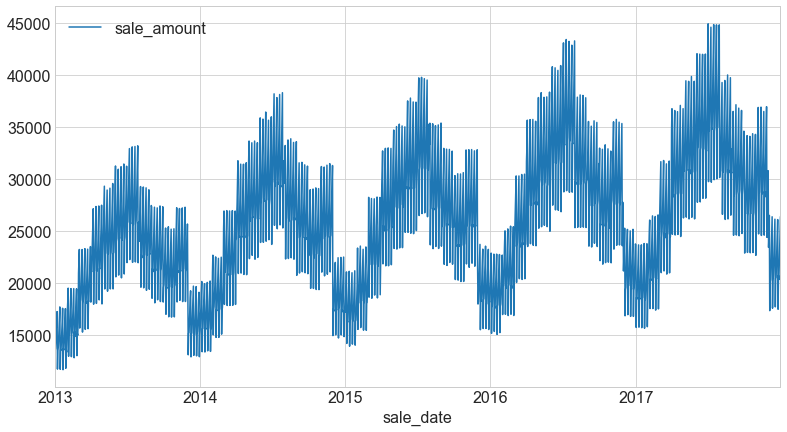

In [44]:
by_date.plot(x='sale_date', y='sale_amount')

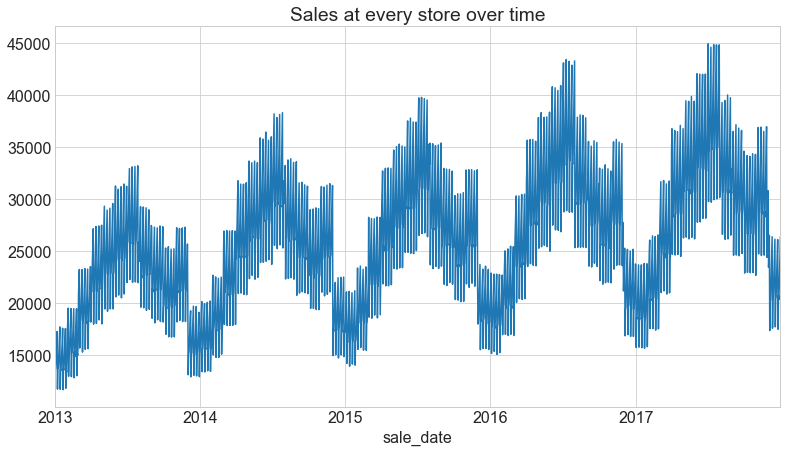

In [43]:
df.groupby('sale_date').sale_amount.sum().plot()
plt.title('Sales at every store over time')
plt.show()

In [46]:
# Are stores represented equally? Histograms seem to say yes
(df.store_id.value_counts() != 91300).sum() == 0

True

In [48]:
# Are items represented equally?
(df.item_id.value_counts() != 18260).sum() == 0

True

In [49]:
# So for each slot we have represented,
# there is a space made for store and for item, regardless of sales numbers
# on that specific dat

In [50]:
# Based on the numbers that we have so far:

We have:
 - 50 items
 - 10 stores
 - 18260 sales for each item
 
Based on this, do we have a congruent initial sale date?

In [55]:
first_sales = df.reset_index().groupby(['store_id', 'item_id']).sale_date.min()

In [56]:
first_sales.unique()

array(['2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [57]:
first_sales.nunique()

1

In [58]:
last_sales = df.reset_index().groupby(['store_id', 'item_id']).sale_date.max()

In [59]:
last_sales.nunique()

1

In [60]:
last_sales.unique()

array(['2017-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [61]:
df.reset_index().groupby(['store_id','item_id']).sale_date.nunique()

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
                     ... 
10        46         1826
          47         1826
          48         1826
          49         1826
          50         1826
Name: sale_date, Length: 500, dtype: int64

In [62]:
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')

In [63]:
n_days

Timedelta('1826 days 00:00:00')

In [64]:
df.index.nunique()

1826

In [65]:
# reproduce this:
def prepare_store_data(df):
    '''
    Takes in store data as loaded,
    cleans the datetime and turns it to a pandas datetime,
    which is then set as the index
    
    Return: pandas DF
    '''
    df['sale_date'] = pd.to_datetime(df.sale_date.str.replace(' 00:00:00 GMT', ''))
    df = df.set_index('sale_date').sort_index()
    return df